# SIR model example

\begin{align}
\dot{S} & = - \alpha\beta\frac{SI}{N}\\
\dot{I} & =  \alpha\beta\frac{SI}{N} - I\frac{1}{\tau_{IR}}\\
\dot{R} & =  I\frac{1}{\tau_{IR}} \\
\end{align}


Where:  
* $S:$ Susceptible Individuals
* $I:$ Infectious Individuals
* $R:$ Removed Individuals
* $\alpha:$ Average number of contacts per person per time
* $\beta:$ Probability of disease transmission in a contact between a susceptible and an infectious subject
* $N:$ Total population
* $\tau_{EI}:$ Transition time between exposed and infectious
* $\tau_{IR}:$ Transition time between infectious and recovered
* $\rho_{RS}:$ Immunity loss rate. Inverse of Immunity loss rate medium time ($\frac{1}{t_{RS}}$)  
* $\phi_S,\phi_E,\phi_I,\phi_R:$ External flux per compartment
* $\Phi$: Total external population flux 

In [1]:
# Util libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# cv19 libraries
from cv19gm.models.sir import SIR
import cv19gm.utils.cv19functions as cv19functions

In [2]:
# For pop-up plots execute this code (optional)
if False:
    import platform
    OS = platform.system()
    
    if OS == 'Linux':    
        %matplotlib tk
        print('Linux')
    elif OS == 'Windows':
        %matplotlib qt
        print('Windows')
    elif OS == 'Darwin':
        %matplotlib tk
        print('Mac (Funciona?)')

# Build a basic SIR model using a configuration file

In [3]:
# Input configuration file
config = 'cfg/SIR.toml'

In [4]:
# Build simulation object
model = SIR(config = config,beta=0.3)

In [5]:
model.solve()

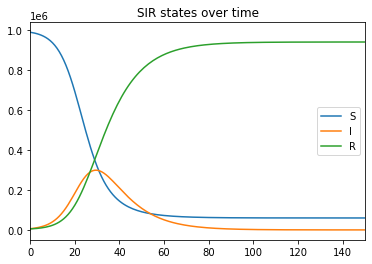

In [6]:
# Plot matplotlib
plt.plot(model.t,model.S,label='S')
plt.plot(model.t,model.I,label='I')
plt.plot(model.t,model.R,label='R')
plt.xlim(0,150)
plt.legend(loc=0)
plt.title('SIR states over time')
plt.show()

In [7]:
# Show results
model.results

,t,dates,S,I,I_d,R,R_d,Flux,I_ac,R_ac,I_det,I_d_det,I_ac_det,beta,alpha,tI_R,rR_S,prevalence_total,prevalence_susc,prevalence_det
0,0,None,989000,6000,3000,5000,0,0,18000,0,6000,3000,18000,0.3,1.0,10.0,0.0,0.018000,0.018000,0.018000
1,1,None,987034,7302,2365,5663,425,0,20365,425,7302,2365,20365,0.3,1.0,10.0,0.0,0.020366,0.020366,0.020366
2,2,None,984649,8881,2402,6469,674,0,22768,1100,8881,2402,22768,0.3,1.0,10.0,0.0,0.022768,0.022768,0.022768
3,3,None,981756,10793,2741,7450,878,0,25509,1978,10793,2741,25509,0.3,1.0,10.0,0.0,0.025509,0.025509,0.025509
4,4,None,978254,13104,3256,8641,1088,0,28766,3066,13104,3256,28766,0.3,1.0,10.0,0.0,0.028766,0.028766,0.028766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,59777,0,0,940222,0,0,949060,935190,0,0,949060,0.3,1.0,10.0,0.0,0.949060,0.949060,0.949060
496,496,None,59777,0,0,940222,0,0,949060,935190,0,0,949060,0.3,1.0,10.0,0.0,0.949060,0.949060,0.949060
497,497,None,59777,0,0,940222,0,0,949060,935190,0,0,949060,0.3,1.0,10.0,0.0,0.949060,0.949060,0.949060
498,498,None,59777,0,0,940222,0,0,949060,935190,0,0,949060,0.3,1.0,10.0,0.0,0.949060,0.949060,0.949060


In [8]:
model.compartments

,t,dates,S,I,I_d,R,R_d,Flux,I_ac,R_ac,I_det,I_d_det,I_ac_det
0,0,None,989000,6000,3000,5000,0,0,18000,0,6000,3000,18000
1,1,None,987034,7302,2365,5663,425,0,20365,425,7302,2365,20365
2,2,None,984649,8881,2402,6469,674,0,22768,1100,8881,2402,22768
3,3,None,981756,10793,2741,7450,878,0,25509,1978,10793,2741,25509
4,4,None,978254,13104,3256,8641,1088,0,28766,3066,13104,3256,28766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,59777,0,0,940222,0,0,949060,935190,0,0,949060
496,496,None,59777,0,0,940222,0,0,949060,935190,0,0,949060
497,497,None,59777,0,0,940222,0,0,949060,935190,0,0,949060
498,498,None,59777,0,0,940222,0,0,949060,935190,0,0,949060
